In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
 len(X_test)

10000

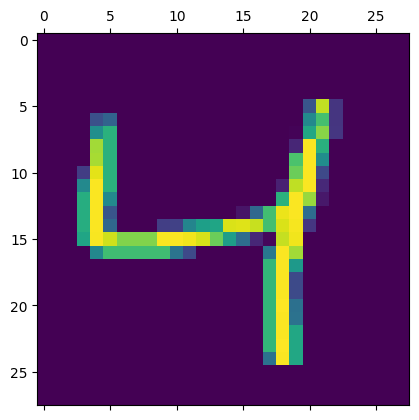

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

In [8]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [9]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
model = tf.keras.Sequential()

In [11]:
model.add(tf.keras.layers.Dense(10, input_shape=(784,),activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.5230 - accuracy: 0.8426
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1837 - accuracy: 0.8768
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.6859 - accuracy: 0.8832
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4393 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3586 - accuracy: 0.8865


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 5.5992 - accuracy: 0.8934


[5.599153518676758, 0.8934000134468079]

In [15]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        9.9999863e-01, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 2.2124526e-15,
        1.0000000e+00, 1.8143981e-13],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.0739362e-38, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.6994755e-37, 0.0000000e+00]], dtype=float32)

In [16]:
import matplotlib.pyplot as plt

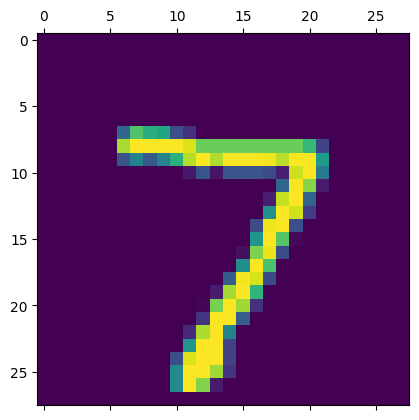

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [19]:
np.argmax(y_predicted[1])

0

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [24]:
import seaborn as sns

<Axes: >

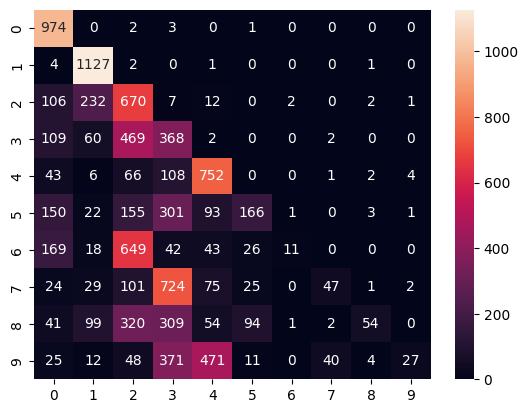

In [25]:
sns.heatmap(cm,annot=True,fmt='d')

In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 5.5992 - accuracy: 0.8934


[5.599153518676758, 0.8934000134468079]